# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [65]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

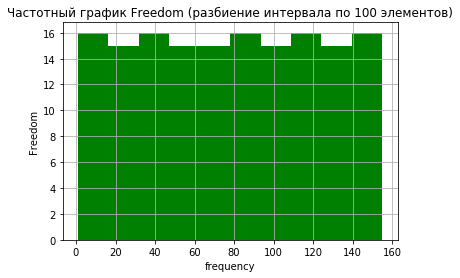

In [28]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

# Оба графика близки к равномерному распределению

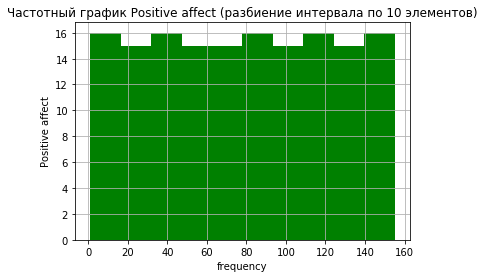

In [29]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

# Оба графика близки к равномерному распределению

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [71]:
# выбросы сразу убрал, чтобы дальше нормально считать
df_2 = df.dropna(subset = ['Freedom'])
df_2['Freedom'].isnull().sum()

print('Median = ', statistics.median(df_2['Freedom']))
# Здесь нельзя посчитать моду, т.к. все значения уникальные
print('Mode = ', statistics.mean(df_2['Freedom']))
print('StDev = ', statistics.pstdev(df_2['Freedom']))
print('Dispersion = ', statistics.pvariance(df_2['Freedom']))
print('Min = ', min(df_2['Freedom']))
print('Max = ', max(df_2['Freedom']))
print('Range = ', max(df_2['Freedom']) - min(df_2['Freedom']))

Median =  78.0
Mode =  78.0
StDev =  44.74371464239419
Dispersion =  2002.0
Min =  1.0
Max =  155.0
Range =  154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601657


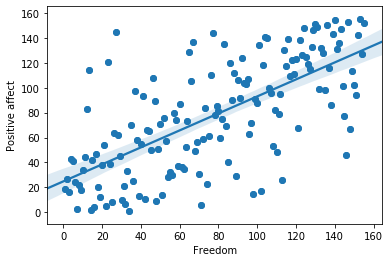

In [78]:
import seaborn as sns
from scipy.stats import pearsonr

freedom = df_2['Freedom']
positive = df_2['Positive affect']
plt.scatter(freedom, positive)
sns.regplot(x= freedom, y=positive,data=df_2, fit_reg=True)

corr, p_value = pearsonr(freedom, positive)
print('Коэффициент корреляции Пирсона:', corr)

# Корреляция 68,2% - близка к сильной, определенно есть линейная зависимость
# Знак коэффициента +, то есть корреляция прямая и с ростом свободы растет показатель positive affect

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [90]:
freedom_1 = df_2['Freedom'] - statistics.mean(df_2['Freedom'])
statistics.mean(freedom_1)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

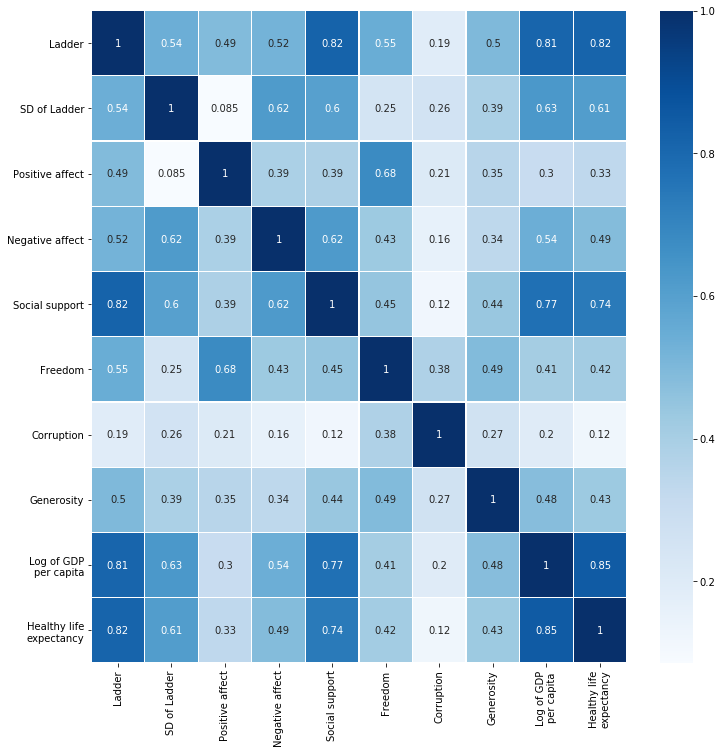

In [97]:
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [99]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_3=pd.read_csv(url)
df_3[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

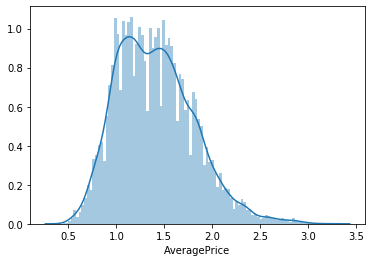

In [117]:
# Распределение близко к нормальному, немного смещено влево (вроде из материалов лекции называется Gamma)
sns.distplot(df_3['AveragePrice'], 100)
plt.show()

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Коэффициент корреляции Пирсона: -0.2083170484878848


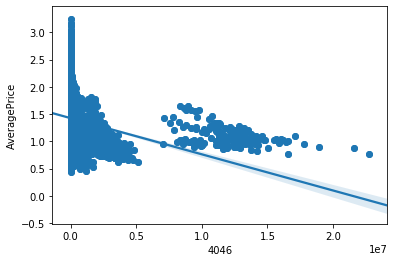

In [119]:
plu = df_3['4046']
price = df_3['AveragePrice']
plt.scatter(plu, price)
sns.regplot(x= plu, y=price,data=df_3, fit_reg=True)

corr, p_value = pearsonr(plu, price)
print('Коэффициент корреляции Пирсона:', corr)

# Корреляция -20,8% - есть очень слабая обратная корреляция, с ростом цены продажи авокадо 4046 едва падают